# Background sculpting

**Goal:** Run the GNN that I trained on 2b events as well.

I want to see:
1. If the massplane distribution is as sculpted
2. Get the corresponding *cutflow* for the background and compare w/ the cutflow that I would have gotten for the baseline analysis, but separately for the 3b and 4b categories (is this ok, or would Max get mad at me for "unblinding"... maybe it's ok if I look at events that are *not* inside the SR)
3. Derive the background estimate
4. Make categories, and compare the significances in each of the bins
5. Get (stats only) limits

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import matplotlib.pyplot as plt

# import dgl
# from dgl.data.tree import SST
# from dgl.data import SSTBatch

# from trainNet import pairAGraph
# from preprocess import *

import os
os.sys.path.append('../code')
from analysis import *

%load_ext autoreload
%autoreload 2

**Jan $10^{th}$ 2019**

I'm reiterating / cleaning up this notebook rn, and I want to test my `pairAndPreprocess` function.

In [5]:
# nbtags = 4
# region = 'SB'

# periods = ['A','B','C','D','E','F','G','H','I','J','K','L']
# for period in periods:

#     print('period',period)
#     fName = f"files/df_period{period}_f_0.22_00*entry_*000.h5"
    
#     dfs = []
#     for myFile in tqdm(glob(fDir + fName)):
#         dfi = pairAndProcess(myFile,nbtags,region )
#         if dfi is not None:
#             dfs.append(dfi)
    
#     if len(dfs) > 0:
#         df = pd.concat(dfs,ignore_index=True)
#         fout = f"{fDir}files/df_period{period}_f_0.22_{nbtags}b_{region}.h5"
#         df.to_hdf(fout,key='df',mode='w')

# df = pd.concat(dfs,ignore_index=True)
# fout = f"{fDir}files/df_period{period}_f_0.22.h5"
# df.to_hdf(fout,key='df',mode='w')

In [68]:
nFiles = 0
fDir = f"../data/{subDir}/"
for period in ['A','B','C','D','E','F','G','H','I','J','K','L']:

    fName = f"files/df_period{period}_f_0.22_00*_entry_*00.h5"
    i = len(glob(fDir+fName))
    print("period",period,":",i)
    nFiles += i

period A : 20
period B : 18
period C : 26
period D : 43
period E : 11
period F : 22
period G : 29
period H : 0
period I : 35
period J : 0
period K : 15
period L : 56


## 1. 2b massplane

**Load in (some) of the data**

I think at this point it would be nice to create two separate dfs for the 2b and 3+4b events.

I can then be careful about blinding the sample that has more b-tags. *Actually, I can't blind with $X_{hh}$, because $X_{hh}$ can't be defined until I have the HCs.* (Prob still good to keep it separate anyways tho.)

I'll start just loading in period A


In [2]:
reload = True
nSelectedJets = 5
period='A'

subDir = 'data_16_PFlow-MAY2019'
if nSelectedJets != 4:
    subDir += f'-{nSelectedJets}jets'
    
trigger ='2016_triggers'


fDir = f"../data/{subDir}/"
#fName = f"files/df_period{period}_f_0.22_00*entry_*000.h5"

In [8]:
cols = ['m4j','nbtags','Xwt','deta_hh',
        'HC1_m','HC2_m','HC1_pt','HC2_pt','HC1_dRjj','HC2_dRjj',
        # Booleans for the cuts n the analysis
        'MDR','MDpT','SR','CR','SB',
        # rw cols
        'njets','pT_2','pT_4','eta_i','dRjj_1','dRjj_2','pt_hh']

In [10]:
len(glob(fDir + fName))

20

In [46]:
[dfi.CR]

0         False
1         False
2          True
3         False
4         False
          ...  
467402    False
467403    False
467404    False
467405     True
467406    False
Name: CR, Length: 467407, dtype: bool

In [47]:
nbtags = -1
region = 'fullmassplane'

periods = ['H','I','J','K','L']
for period in periods:
    
    print('period',period)
    fName = f"files/df_period{period}_f_0.22_00*entry_*000.h5"
    
    dfs = []
    for myFile in tqdm(glob(fDir + fName)):
        dfi = pairAndProcess(myFile,nbtags,region, cols=cols)
        if dfi is not None:
            dfs.append(dfi)

    if len(dfs) > 0:
        df = pd.concat(dfs,ignore_index=True)
        fout = f"{fDir}files/df_period{period}_f_0.22_fullmassplane.h5"
        df.to_hdf(fout,key='df',mode='w')
        


0it [00:00, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

period H
period I
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000023_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



  3%|▎         | 1/35 [01:05<37:09, 65.59s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000017_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



  6%|▌         | 2/35 [01:27<28:47, 52.33s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000001_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



  9%|▊         | 3/35 [01:37<21:12, 39.76s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000005_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 11%|█▏        | 4/35 [01:41<15:02, 29.10s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000035_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 14%|█▍        | 5/35 [01:51<11:41, 23.40s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000029_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 17%|█▋        | 6/35 [01:59<08:58, 18.56s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000022_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 20%|██        | 7/35 [03:00<14:36, 31.31s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000015_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 23%|██▎       | 8/35 [03:27<13:35, 30.21s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000018_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 26%|██▌       | 9/35 [03:48<11:49, 27.27s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000009_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 29%|██▊       | 10/35 [04:12<10:58, 26.32s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000026_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 31%|███▏      | 11/35 [04:20<08:23, 20.96s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000020_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 34%|███▍      | 12/35 [04:45<08:27, 22.07s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000032_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 37%|███▋      | 13/35 [05:37<11:22, 31.00s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000024_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 40%|████      | 14/35 [06:18<11:53, 33.95s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000021_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 43%|████▎     | 15/35 [07:01<12:15, 36.79s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000016_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 46%|████▌     | 16/35 [07:18<09:45, 30.80s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000034_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 49%|████▊     | 17/35 [07:37<08:12, 27.38s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000025_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 51%|█████▏    | 18/35 [08:17<08:48, 31.07s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000022_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 54%|█████▍    | 19/35 [08:47<08:14, 30.88s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000003_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 57%|█████▋    | 20/35 [09:19<07:44, 30.98s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000004_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 60%|██████    | 21/35 [09:27<05:38, 24.20s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000014_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 63%|██████▎   | 22/35 [09:39<04:29, 20.70s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000010_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 66%|██████▌   | 23/35 [10:19<05:16, 26.39s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000007_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 69%|██████▊   | 24/35 [10:41<04:35, 25.03s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000033_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 71%|███████▏  | 25/35 [11:15<04:38, 27.83s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000019_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 74%|███████▍  | 26/35 [11:47<04:22, 29.14s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000028_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 77%|███████▋  | 27/35 [11:54<02:59, 22.48s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000030_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 80%|████████  | 28/35 [12:09<02:19, 20.00s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000012_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 83%|████████▎ | 29/35 [12:22<01:47, 17.89s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000027_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 86%|████████▌ | 30/35 [12:27<01:10, 14.03s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000002_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 89%|████████▊ | 31/35 [12:52<01:09, 17.46s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000031_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 91%|█████████▏| 32/35 [13:36<01:16, 25.35s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000023_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 94%|█████████▍| 33/35 [13:38<00:36, 18.28s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000008_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 97%|█████████▋| 34/35 [13:53<00:17, 17.27s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodI_f_0.22_000013_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



100%|██████████| 35/35 [14:40<00:00, 25.16s/it]

0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

period J
period K
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000012_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



  7%|▋         | 1/15 [01:01<14:22, 61.57s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000011_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 13%|█▎        | 2/15 [01:46<12:14, 56.51s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000007_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 20%|██        | 3/15 [02:06<09:05, 45.49s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000006_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 27%|██▋       | 4/15 [02:56<08:36, 46.93s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000015_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 33%|███▎      | 5/15 [03:57<08:32, 51.28s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000012_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 40%|████      | 6/15 [04:23<06:31, 43.55s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000008_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 47%|████▋     | 7/15 [04:36<04:34, 34.32s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000014_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 53%|█████▎    | 8/15 [05:12<04:04, 34.87s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000009_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 60%|██████    | 9/15 [05:24<02:47, 27.97s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000002_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 67%|██████▋   | 10/15 [05:35<01:54, 22.89s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000013_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 73%|███████▎  | 11/15 [06:01<01:35, 24.00s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000004_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 80%|████████  | 12/15 [06:13<01:00, 20.22s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000003_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 87%|████████▋ | 13/15 [06:43<00:46, 23.21s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000008_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 93%|█████████▎| 14/15 [07:43<00:34, 34.34s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodK_f_0.22_000015_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



100%|██████████| 15/15 [07:55<00:00, 31.70s/it]

  0%|          | 0/56 [00:00<?, ?it/s]

period L
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000007_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



  2%|▏         | 1/56 [00:16<15:00, 16.38s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000015_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



  4%|▎         | 2/56 [00:52<20:05, 22.33s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000031_entry_1000000_1500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



  5%|▌         | 3/56 [01:25<22:28, 25.44s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000023_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



  7%|▋         | 4/56 [01:37<18:36, 21.48s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000001_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



  9%|▉         | 5/56 [01:38<13:08, 15.46s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000036_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 11%|█         | 6/56 [02:40<24:18, 29.16s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000036_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 12%|█▎        | 7/56 [03:06<23:05, 28.27s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000027_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 14%|█▍        | 8/56 [03:28<21:05, 26.37s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000026_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 16%|█▌        | 9/56 [03:30<14:54, 19.03s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000010_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 18%|█▊        | 10/56 [04:14<20:26, 26.66s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000039_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 20%|█▉        | 11/56 [04:35<18:43, 24.97s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000005_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 21%|██▏       | 12/56 [05:31<25:11, 34.34s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000042_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 23%|██▎       | 13/56 [05:33<17:30, 24.44s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000007_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 25%|██▌       | 14/56 [06:42<26:28, 37.82s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000032_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 27%|██▋       | 15/56 [06:46<19:03, 27.89s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000013_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 29%|██▊       | 16/56 [06:50<13:43, 20.59s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000044_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 30%|███       | 17/56 [07:31<17:21, 26.71s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000030_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 32%|███▏      | 18/56 [08:26<22:12, 35.06s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000003_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 34%|███▍      | 19/56 [08:32<16:21, 26.52s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000034_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 36%|███▌      | 20/56 [09:31<21:41, 36.16s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000016_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 38%|███▊      | 21/56 [09:55<19:01, 32.60s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000033_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 39%|███▉      | 22/56 [10:06<14:47, 26.10s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000028_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 41%|████      | 23/56 [10:16<11:42, 21.28s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000040_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 43%|████▎     | 24/56 [11:14<17:17, 32.43s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000016_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 45%|████▍     | 25/56 [12:16<21:15, 41.15s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000038_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 46%|████▋     | 26/56 [12:48<19:12, 38.41s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000031_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 48%|████▊     | 27/56 [13:50<21:57, 45.44s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000029_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 50%|█████     | 28/56 [14:13<18:07, 38.83s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000008_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 52%|█████▏    | 29/56 [14:23<13:31, 30.05s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000017_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 54%|█████▎    | 30/56 [15:15<15:56, 36.78s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000019_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 55%|█████▌    | 31/56 [16:18<18:37, 44.71s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000020_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 57%|█████▋    | 32/56 [17:04<17:57, 44.90s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000019_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 59%|█████▉    | 33/56 [17:15<13:16, 34.64s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000014_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 61%|██████    | 34/56 [17:20<09:30, 25.91s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000024_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 62%|██████▎   | 35/56 [17:45<09:00, 25.76s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000035_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 64%|██████▍   | 36/56 [18:09<08:23, 25.18s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000022_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 66%|██████▌   | 37/56 [18:32<07:44, 24.47s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000004_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 68%|██████▊   | 38/56 [19:03<07:57, 26.51s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000026_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 70%|██████▉   | 39/56 [20:10<10:54, 38.47s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000021_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 71%|███████▏  | 40/56 [20:53<10:36, 39.75s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000037_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 73%|███████▎  | 41/56 [21:56<11:42, 46.86s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000006_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 75%|███████▌  | 42/56 [22:08<08:30, 36.43s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000018_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 77%|███████▋  | 43/56 [23:01<08:59, 41.50s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000041_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 79%|███████▊  | 44/56 [23:07<06:08, 30.72s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000043_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 80%|████████  | 45/56 [23:58<06:46, 36.92s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000020_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 82%|████████▏ | 46/56 [25:01<07:26, 44.69s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000011_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 84%|████████▍ | 47/56 [25:14<05:15, 35.10s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000002_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt



 86%|████████▌ | 48/56 [25:14<03:17, 24.72s/it]

Calculating Xhh
Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000024_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 88%|████████▊ | 49/56 [26:16<04:10, 35.73s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000045_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 89%|████████▉ | 50/56 [26:35<03:04, 30.80s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000034_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 91%|█████████ | 51/56 [27:36<03:19, 39.97s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000012_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 93%|█████████▎| 52/56 [27:57<02:16, 34.14s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000025_entry_500000_1000000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 95%|█████████▍| 53/56 [28:20<01:32, 30.86s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000009_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 96%|█████████▋| 54/56 [29:22<01:20, 40.11s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000033_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



 98%|█████████▊| 55/56 [30:27<00:47, 47.48s/it]

Scaling pt.
Scaling E.
Saving  ../data/data_16_PFlow-MAY2019-5jets/files/df_periodL_f_0.22_000047_entry_0_500000_scaledInputs.h5
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Getting jet pts
Getting jet etas
Getting jet phis
Getting jet Es
Calculating Xwt
Calculating Xhh



100%|██████████| 56/56 [30:44<00:00, 32.94s/it]


Next loop over the periods and concatenate

In [48]:
dfs = []

periods = ['A','B','C','D','E','F','G','H','I','J','K','L']
for period in periods:

    print('period',period)
    fName = f"files/df_period{period}_f_0.22_{region}.h5"
    
    if os.path.exists(fDir+fName):
        dfi = pd.read_hdf(fDir+fName,key='df')
        dfs.append(dfi)
    else:
        print(fDir+fName)

df = pd.concat(dfs,ignore_index=True)
fout = f"{fDir}df_f_0.22_{region}.h5"
df.to_hdf(fout,key='df',mode='w')

period A
period B
period C
period D
period E
period F
period G
period H
../data/data_16_PFlow-MAY2019-5jets/files/df_periodH_f_0.22_fullmassplane.h5
period I
period J
../data/data_16_PFlow-MAY2019-5jets/files/df_periodJ_f_0.22_fullmassplane.h5
period K
period L


In [49]:
df.head()

m4j  nbtags       Xwt   deta_hh       HC1_m       HC2_m  \
0  813.706916       3  6.691344  0.760314   82.984563  137.839626   
1  310.964570       3  2.994519  2.558353   62.300644  126.458954   
2  385.289116       2  3.725297  0.622442  166.319333  101.599533   
3  714.077979       3  4.495913  2.966884  213.760175   87.935848   
4  288.370953       3  3.590977  0.468956  124.858541   50.268998   

   HC1_vecSum_pt  HC2_vecSum_pt  HC1_dRjj  HC2_dRjj  ...     SR     CR     SB  \
0              0              0  0.514983  0.899647  ...  False  False  False   
1              0              0  0.902998  2.702081  ...  False  False  False   
2              0              0  2.006358  1.545116  ...  False  False   True   
3              0              0  2.547126  1.409110  ...  False  False  False   
4              0              0  1.902618  0.710992  ...  False  False  False   

   njets        pT_2       pT_4     eta_i    dRjj_1    dRjj_2       pt_hh  
0    4.0  278.818604  69.876205  2.008060  0.514983  0.899647   20.928099  
1    6.0   65.445194  56.960532  0.616908  0.902998  2.702081   99.894391  
2    4.0   88.873055  46.866707 -0.529808  1.545116  2.006358   17.175302  
3    6.0   67.628220  46.569927  0.966224  1.409110  2.547126  117.401132  
4    5.0   92.288696  46.319592  0.264498  0.710992  1.902618  112.827327  

[5 rows x 22 columns]

In [ ]:
df.events

Note for future self: If I put the HC formation w/ the GNN inside `preprocess.py`, I could get the cutflow #s in this block as well.

Look at the massplane before applying the rest of the analysis selection. (Note: It would also be nice maybe to compare to the baseline at this point, maybe with some metrics for the smoothness as well, such as the moments of the distributions?)

Maybe I could use Lucas's really nice massplane script?

In [15]:
from plotting import massPlane

Running w/ conda env: don't import root packages.


In [19]:
df.columns

Index(['m4j', 'njets', 'pT_2', 'pT_4', 'eta_i', 'dRjj_1', 'dRjj_2', 'pt_hh'], dtype='object')

**Next:** Let's make this same plot with [Lucas's massplane fucntion](https://gitlab.cern.ch/lborgna/eda_tools/blob/master/plot_helper.py#190-278)

In [59]:
os.sys.path.append('../eda_tools')
from plot_helper import massplane

In [83]:
subDir

'data_16_PFlow-MAY2019-5jets'

In [85]:
figDir = f'figures/{subDir}/xformer_train_SMNR_mc16ade/'

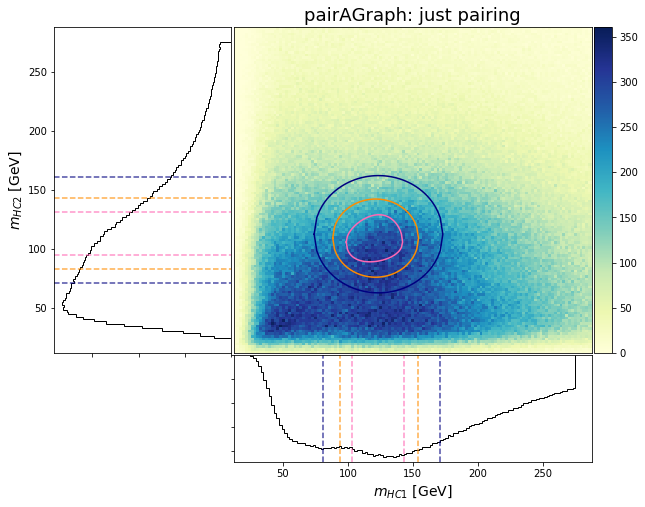

In [86]:
kwargs = {'figsize': (10, 8),
           'bins' : (125, 125),
           'xrange': (25, 275),
           'yrange': (25, 275),
           'xhisttype': 'step',
           'yhisttype': 'step',
           'cmap': 'YlGnBu',
           'title': 'pairAGraph: just pairing',
           'xlabel': '$m_{HC1}$ [GeV]',
           'ylabel': '$m_{HC2}$ [GeV]',
           'axis_hist_on': True,
           'hist_color': 'black',
           'filename': f'{figDir}/massplane_4jetsGNN.pdf',
           'alpha': 0.7,
           'save': True,
           'show': True
          }


fig = massplane(df.loc[df.nbtags==2,'HC1_m'],
                df.loc[df.nbtags==2,'HC2_m'],**kwargs)

fig.show()

In [73]:
df['cut_deta_hh'] = (df.deta_hh < 1.5) & (df.MDpT)
df['cut_Xwt'] = (df.Xwt > 1.5) & (df.cut_deta_hh)

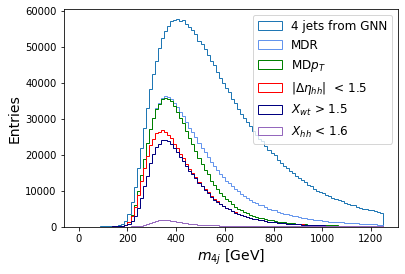

In [75]:
density=False

plt.hist(df.m4j[df.nbtags==2],100,(0,1250),histtype='step',label='4 jets from GNN',
         #weights=df.mc_sf,color='darkorange',
         density=density)
plt.hist(df.m4j[(df.nbtags==2)&(df.MDR)],100,(0,1250),histtype='step',label='MDR',
         #weights=df.loc[df.MDR,'mc_sf'],
         color='cornflowerblue',density=density)
plt.hist(df.m4j[(df.nbtags==2)&df.MDpT],100,(0,1250),histtype='step',label='MD$p_T$',
         #weights=df.loc[df.MDpT,'mc_sf'],
         color='green',density=density)
plt.hist(df.m4j[(df.nbtags==2)&df.cut_deta_hh],100,(0,1250),histtype='step',label='$|\Delta \eta_{hh}|$  < 1.5',
         #weights=df.loc[df.cut_deta_hh,'mc_sf'],
         color='red',density=density)
plt.hist(df.m4j[(df.nbtags==2)&df.cut_Xwt],100,(0,1250),histtype='step',label='$X_{wt}$ > 1.5',
         #weights=df.loc[df.cut_Xwt,'mc_sf'],
         color='navy',density=density)
plt.hist(df.m4j[(df.nbtags==2)&df.cut_Xwt & df.SR],100,(0,1250),histtype='step',label='$X_{hh}$ < 1.6',
         #weights=df.loc[df.cut_Xwt & df.SR,'mc_sf'],
         color='C4',density=density)


plt.xlabel('$m_{4j}$ [GeV]',fontsize=14)
plt.ylabel('Entries',fontsize=14)
plt.legend(fontsize=12)

# ax = plt.gca()
# plt.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)

plt.show()



Maybe I should also look at the 3b and 4b backgrounds?

Ok, this is *aweseome* and super interesting!

Let's look at the massplane again after all of the cuts are applied!

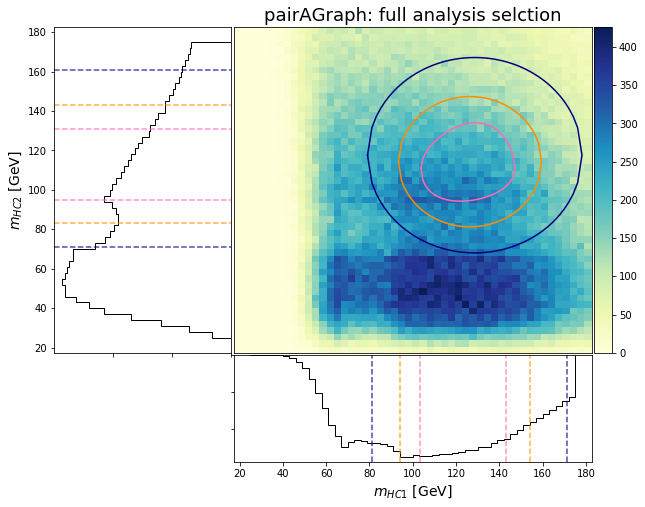

In [88]:
kwargs['title'] = 'pairAGraph: full analysis selction'
kwargs['bins'] = (50, 50)
kwargs['xrange'] = (25, 175)
kwargs['yrange'] = (25, 175)
kwargs['filename'] = f'{figDir}/massplane_allCuts.pdf'

fig = massplane(df.loc[(df.nbtags==2)&(df.cut_Xwt),'HC1_m'],
                df.loc[(df.nbtags==2)&(df.cut_Xwt),'HC2_m'],
                **kwargs)

fig.show()

Ok, we've seen these stripes form the $X_{wt}$ cut before, I'll probably need to derive the background estimate *before* $X_{wt}$ and then apply it after $X_{wt}$.

**Look at the same plot *before* $X_{wt}$**

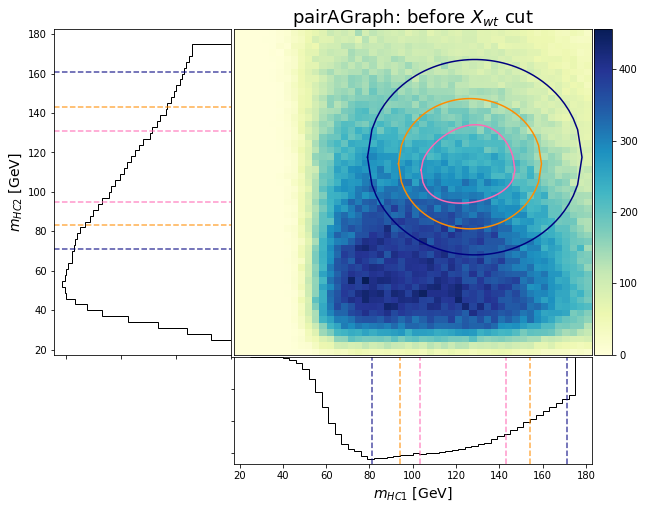

In [89]:
kwargs['title'] = 'pairAGraph: before $X_{wt}$ cut'
kwargs['filename'] = f'{figDir}/massplane_preXwt.pdf'

fig = massplane(df.loc[(df.nbtags==2)&(df.cut_deta_hh),'HC1_m'],
                df.loc[(df.nbtags==2)&(df.cut_deta_hh),'HC2_m'],
                **kwargs)

fig.show()

In [82]:
df.columns

Index(['m4j', 'nbtags', 'Xwt', 'deta_hh', 'HC1_m', 'HC2_m', 'HC1_vecSum_pt',
       'HC2_vecSum_pt', 'HC1_dRjj', 'HC2_dRjj', 'MDR', 'MDpT', 'SR', 'CR',
       'SB', 'njets', 'pT_2', 'pT_4', 'eta_i', 'dRjj_1', 'dRjj_2', 'pt_hh',
       'cut_deta_hh', 'cut_Xwt'],
      dtype='object')

## 2. Cutflows

Ok, this is pretty encouraging, the only thing I'm conerned about actually when looking @ these plots is whether or not I have the HCs in the correct order.

## 3. Background estimate

I think it would be really nice to use Sean's new NN for the [background reweighting](https://gitlab.cern.ch/hh4b/hh4b-background-estimation/blob/nn-reweighting/Resolved/NN_RW.py) script.

- It uses the same variables as the prev iteration of the analysis, except it also uses $p_T^{hh}$
- Before ... he takes the log of ...
- Are all the variables normalized?
- 

**It might be useful to work through Sean's proof here too... just to make sure that I understand it as well!** 


### 3.1 Preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler

In [31]:
np.mean(df_3b.nbtags==4)

0.05876812325495341

In [77]:
# class rwDataset():
    
#     def __init__(self, df_2b, df_3b):        
#         '''
#         Goal: Load in the jet level variables into a pytorch dataframe to be ready
#         for training, and do the necessary ml pre-processing.
#         '''
        
#         rw_columns = ['njets','eta_i','pT_2','pT_4','dRjj_1','dRjj_2','pt_hh']
        
#         # We reweight in the SB at the end of the analysis
#         original = df_2b.loc[df_2b.cut_Xwt & df_2b.SB,rw_columns]
#         target   = df_3b.loc[df_3b.cut_Xwt & df_3b.SB & (df_3b.nbtags>=4),rw_columns]
        
#         X = pd.concat((original, target), ignore_index=True).values
#         X[:,2:] = np.log(X[:,2:])
        
#         y = []
#         for _df, ID in [(original,1), (target, 0)]:
#             y.extend([ID] * _df.shape[0])
#         y = np.array(y)

#         scaler = StandardScaler()
#         X_scaled = scaler.fit_transform(X)

#         self.X = torch.from_numpy(X_scaled).float()
#         self.y = torch.from_numpy(y).float()
        
#         # Save the scaling file for evaluation (later)
#         d = {}
#         d['mean'] = list(scaler.mean_)
#         d['scale'] = list(scaler.scale_)
#         d['var'] = list(scaler.var_)
#         d['n_samples_seen'] = int(scaler.n_samples_seen_)

#         with open('rw_scale.json', 'w') as varfile:
#             json.dump(d, varfile)
        
        
#     def __len__(self):
#         return self.X.shape[0] 

#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]


**To do for later:** I should really combine these two functions rwDataset and getDataLoaders into a single function that also makes some basic preprocessing plots.

In [79]:
loader_train, loader_val = getDataLoaders()

Let's look at the plots!!

### 3.2 Model definition

**Plan:** I'm going to implement this in pytorch instead of keras!!


In [80]:
import torch.nn as nn
import torch.nn.functional as F

In [81]:
class reweighter(nn.Module):

    def __init__(self,inpt_dim=7,hidden_dim=20,nLayers=3):
        '''
        Inputs:
        - inpt_dim: The number of features used for the reweighting
            Default 7 for njets, pT_2, pT_4, eta_i, dRjj_1, dRjj_2, pt_hh
        - hidden_dim: The dimension for the hidden layers
        '''

        super(reweighter, self).__init__()

        self.h1  = nn.Linear(inpt_dim,  hidden_dim)
        self.h2  = nn.Linear(hidden_dim,hidden_dim)
        self.h3  = nn.Linear(hidden_dim,hidden_dim)
        self.out = nn.Linear(hidden_dim,1)

    def forward(self, x):
    
        h = self.h1(x)
        
        for linear in [self.h2,self.h3,self.out]:
            h = nn.ReLU()(h)
            h = linear(h)
            
        return h
        

In [120]:
rw = reweighter()
#rw.to(device)

### 3.3 Model training

The loss that Sean was using is defined below, and he was using the adam optimizer,  training for a maximum of 50 epochs w/ early stopping.


In [93]:
def louppe_loss(y_true, y_pred):
    return torch.mean(y_true * (torch.sqrt(torch.exp(y_pred))) + 
            (1.0 - y_true) * (1.0 / torch.sqrt(torch.exp(y_pred))))


In [121]:
optimizer = torch.optim.Adam(rw.parameters(), lr=.001)

nEpochs = 50

# keys = ["_".join([s,m]) for s in ['train','val'] for m in ['loss','acc','acc_3b','acc_4b']]
# metrics = {k:[] for k in keys}

device = 'cuda:9' if torch.cuda.is_available() else 'cpu'
rw.to(device=device)

for epoch in range(nEpochs):

    L = 0
    rw.train()

    for xi,yi in loader_train:

        xi = xi.to(device=device)
        yi = yi.to(device=device)

        optimizer.zero_grad()

        pred = rw(xi)
        loss = louppe_loss(yi, pred)
                
        loss.backward()
        optimizer.step()

        L += loss.item()

    print(L)

3.909273087978363
3.8561792373657227
3.8123204112052917
3.761599600315094
3.7140222787857056
3.6563039422035217
3.5966148376464844
3.526282846927643
3.4561824202537537
3.350899338722229
3.2559974193573
3.1302079558372498
2.961924195289612
2.8230115175247192
2.6580000519752502
2.4960069060325623
2.4533974528312683
2.423941135406494
2.438892960548401
2.3556227684020996
2.3589115142822266
2.3512513637542725
2.4059022665023804
2.33966326713562
2.382145404815674
2.318905472755432
2.3322980403900146
2.2657440900802612
2.3568291664123535
2.3917779326438904
2.3090694546699524
2.2660043239593506
2.3478638529777527
2.3118600249290466
2.3178587555885315
2.22180712223053
2.2974430918693542
2.27170467376709
2.3214076161384583
2.284314453601837
2.2671684622764587
2.3485732078552246
2.2647337317466736
2.3376529216766357
2.3190293312072754
2.223556876182556
2.293507695198059
2.309213936328888
2.3426762223243713
2.274187445640564


Plot the training metrics

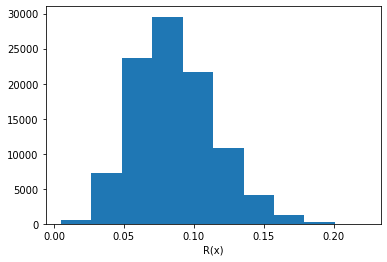

In [122]:
def getWeights(rw):
    '''
    Goal: Given the NN reweighting model, get the associated weights
    to get from the 2b dataset to the anticipated 4b dists
    '''

    rw_columns = ['njets','eta_i','pT_2','pT_4','dRjj_1','dRjj_2','pt_hh']
    X = df_2b[rw_columns].values
    X[:,2:] = np.log(X[:,2:])

    with open("rw_scale.json", 'r') as varfile:
        varinfo = json.load(varfile)

    scaler        = StandardScaler(copy=False) # scale the data in place
    scaler.mean_  = varinfo['mean']
    scaler.scale_ = varinfo['scale'] 
    scaler.var_   = varinfo['var'] 
    scaler.n_samples_seen_ = varinfo['n_samples_seen'] 
    scaler.transform(X)

    Xpt = torch.tensor(X).float().to(device)

    rw.eval()
    R = torch.exp(rw(Xpt)).cpu().detach().numpy()

    plt.hist(R)
    plt.xlabel('R(x)')
    plt.show()
    
    N_2b = np.sum((df_2b.cut_Xwt)&df_2b.SB)
    N_4b = np.sum((df_3b.nbtags>=4)&(df_3b.cut_Xwt)&df_3b.SB)

    df_2b['w_2b'] = R #* N_4b / N_2b
    
getWeights(rw)

### 3.4 Evaluation

Compare the output distributions on the reweighting variables.

In [125]:
np.sum(SB_4b&(df_3b.njets==4)),np.sum(SB_4b&(df_3b.njets==5))

(132, 132)

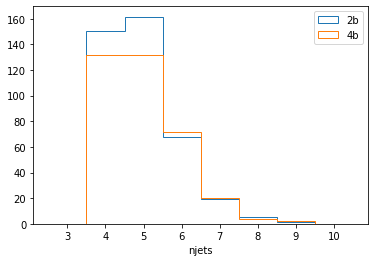

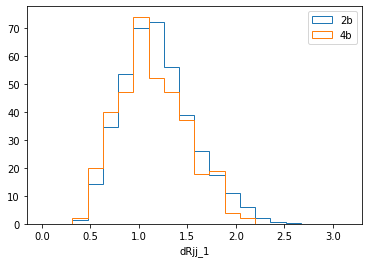

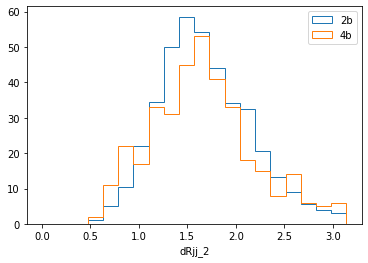

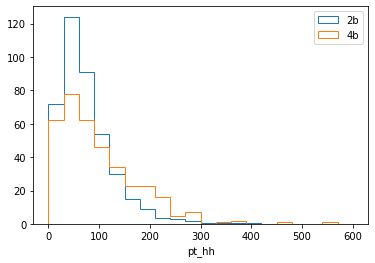

In [123]:
SB_2b = (df_2b.cut_Xwt) & df_2b.SB
SB_4b = (df_3b.nbtags>=4)&(df_3b.cut_Xwt)&df_3b.SB

for c,b,r in zip(['njets','pT_4','pT_2','eta_i','dRjj_1','dRjj_2','pt_hh'],
                 [8]+[20]*6,
                 [(2.5,10.5),(0,125),(0,200),(0,2.5),(0,np.pi),(0,np.pi),[0,600]]):
    plt.figure()
    plt.hist(df_2b.loc[SB_2b,c],b,r,histtype='step',
             weights=df_2b.loc[SB_2b,'w_2b'],label='2b')
    plt.hist(df_3b.loc[SB_4b,c],b,r,histtype='step',label='4b')
    plt.legend()
    plt.xlabel(c)
plt.show()

This looks reasonable, but I'm still not sure about the normalization.

**I'll ask Sean or Rafael tomorrow!**

## 4. Analysis Categorization

## 5. Stats only limits